# Student Performance Factors Analysis

Predicting exam scores based on various educational and environmental factors.

## 1. Library Imports

Importing necessary libraries for data manipulation, visualization, and machine learning.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## 2. Data Loading And Visualisation

Loading the dataset from a CSV file.
And then visualising the data using Box plot for categorical and regular linear for numerical.

In [27]:
df = pd.read_csv('StudentPerformanceFactors.csv')

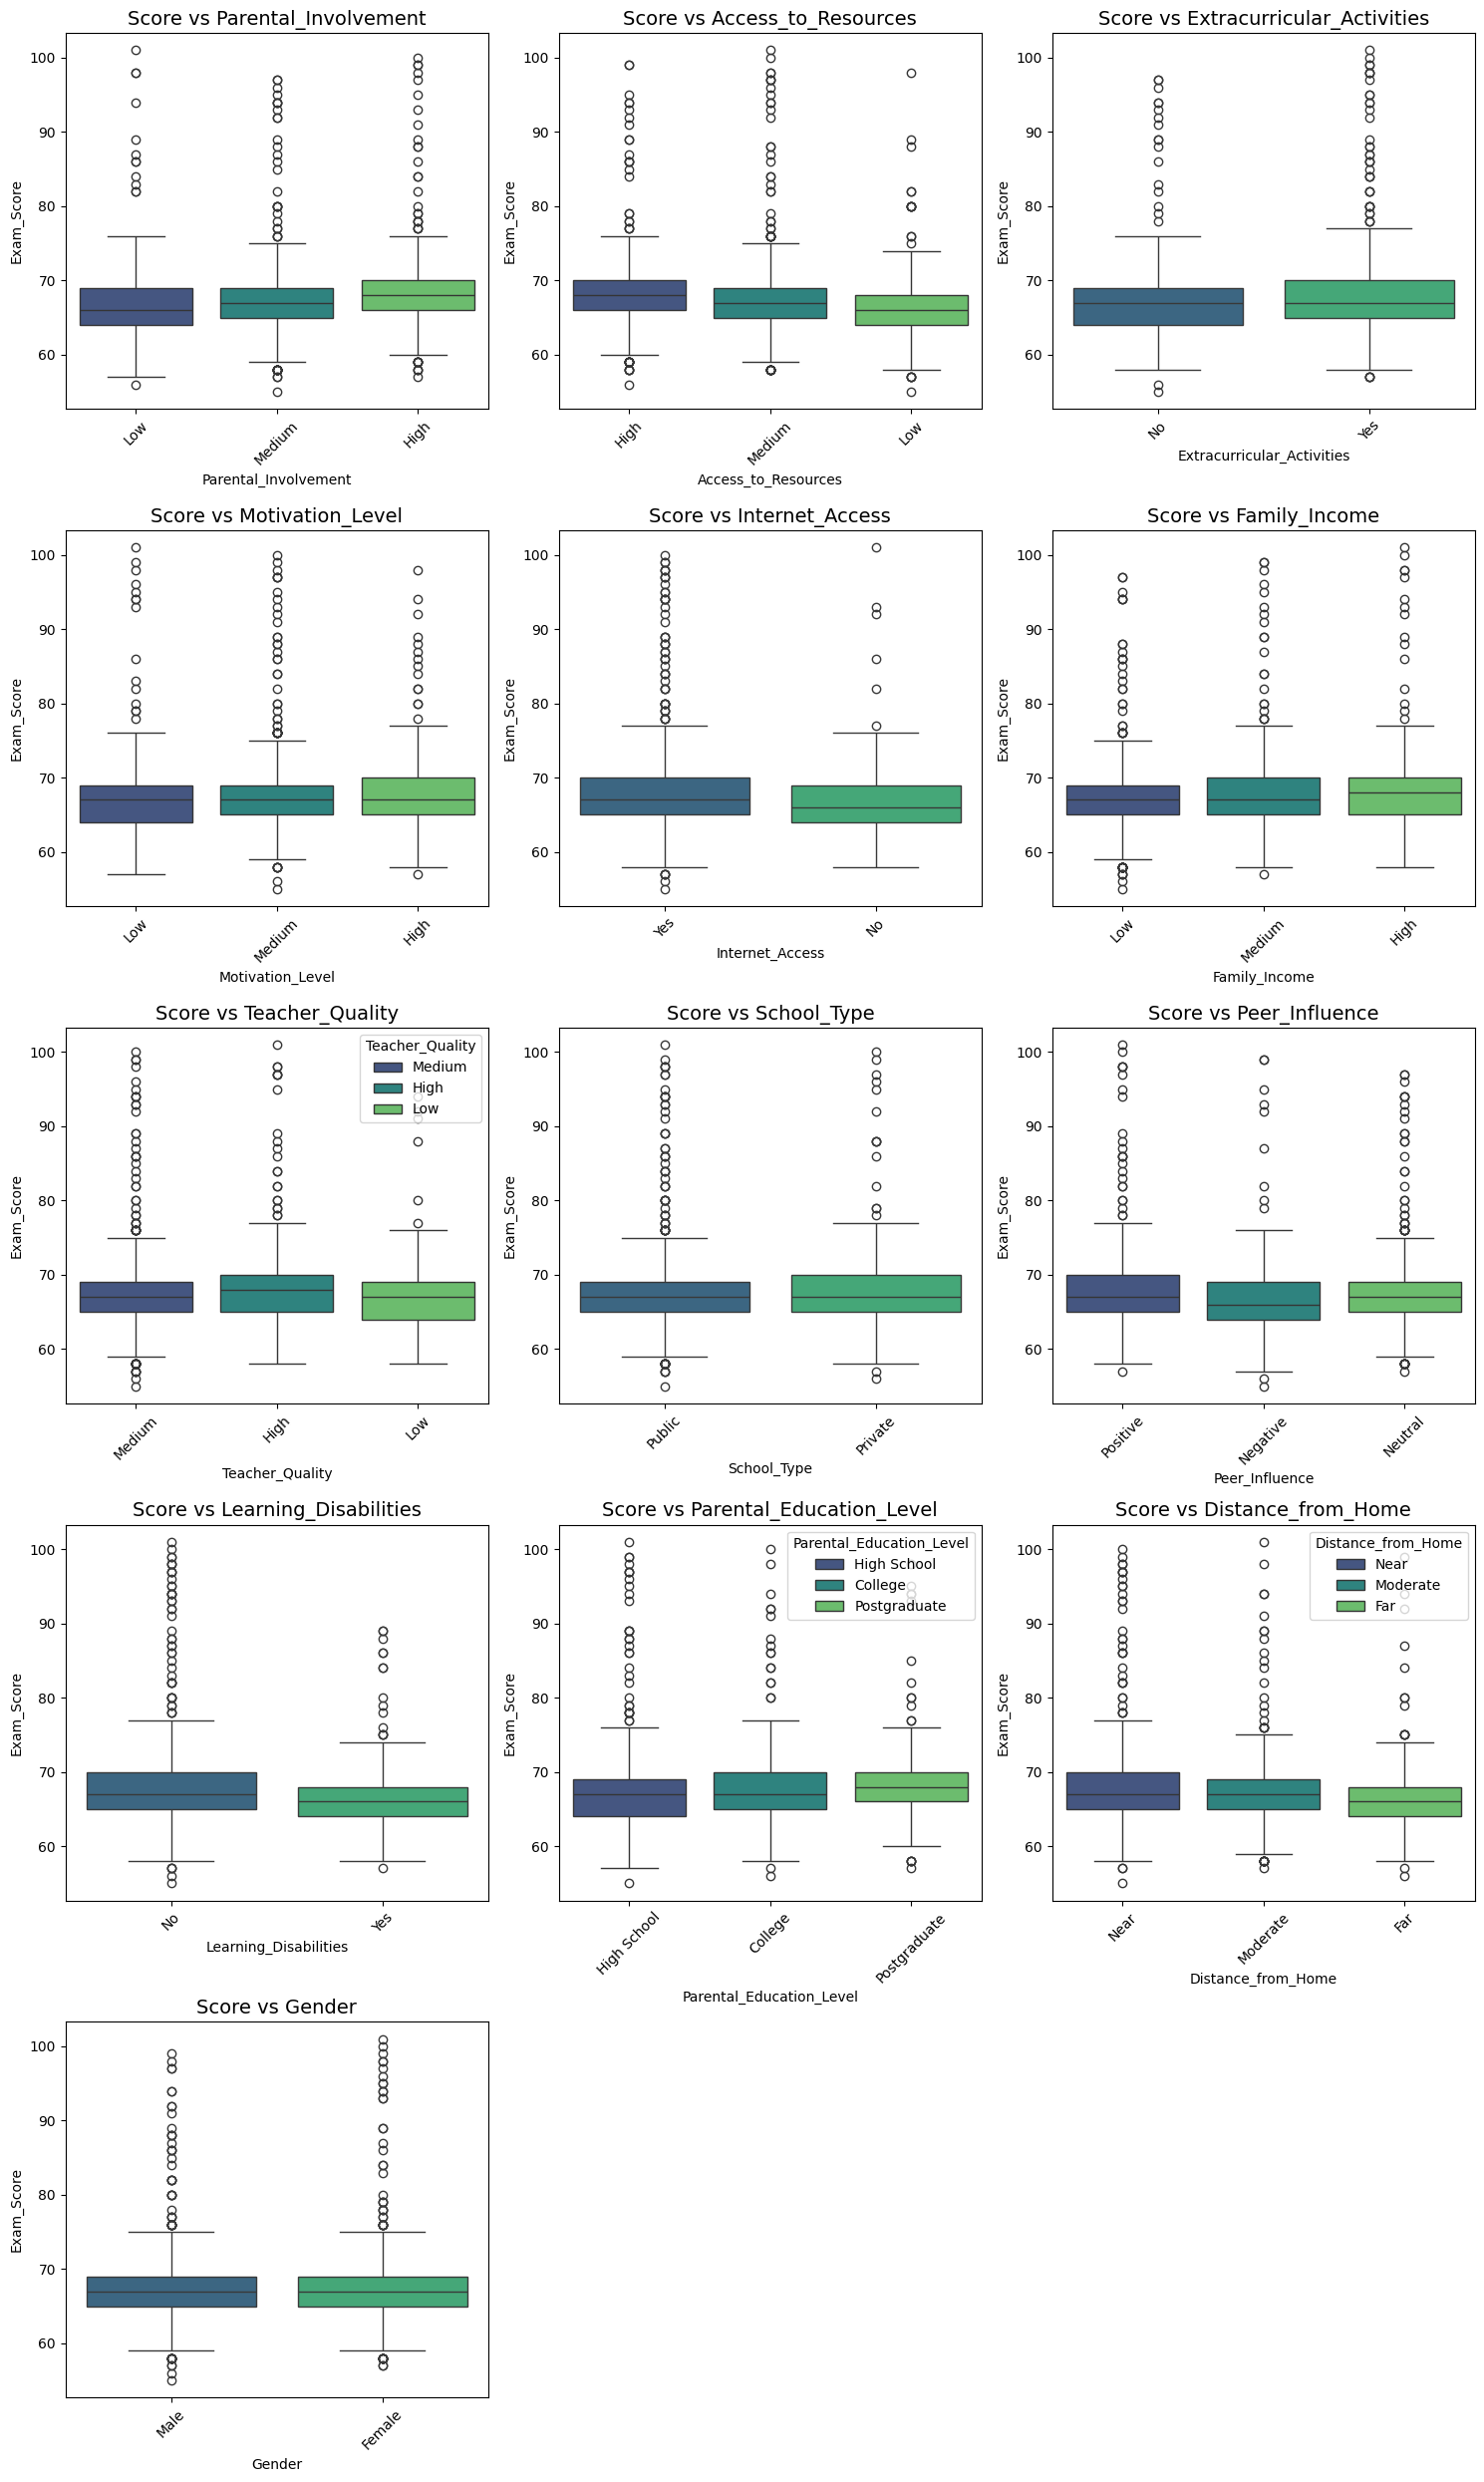

In [28]:
categorical_data_cols = df.select_dtypes(include='object').columns
num_categorical_data_cols = len(categorical_data_cols)

num_row = 3
num_col = np.ceil(num_categorical_data_cols / num_row)
fig, axes = plt.subplots(5, 3, figsize=(15, 25))
axes = axes.flatten()

for i, col in enumerate(categorical_data_cols):
    sns.boxplot(ax=axes[i], data=df, x=col, hue=col, y='Exam_Score', palette='viridis')
    axes[i].set_title(f'Score vs {col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

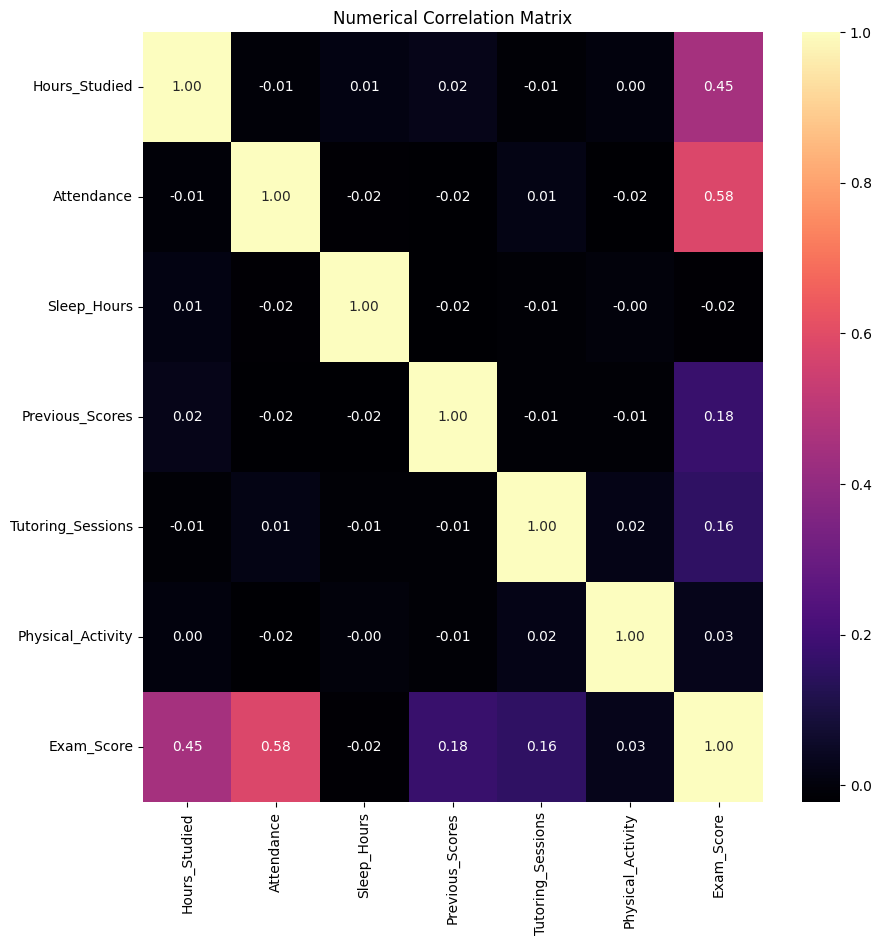

In [29]:
numerical_data_cols = df.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
correlation_matrix = numerical_data_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Numerical Correlation Matrix')
plt.show()

## 3. Feature and Target Separation

Separating the dataset into feature matrix (X) and target vector (Y).

In [30]:
numerical_cols = df.select_dtypes(include=['number']).columns
str_cols = df.select_dtypes(exclude=['number']).columns

X = df[numerical_cols]
X = X.drop('Exam_Score', axis=1)
Y = df.iloc[:, -1]

## 4. Categorical Data Handling

Applying One-Hot Encoding: using binary encoding for features with two unique values and full OHE for multi-category features.

In [31]:
binary_ohe = OneHotEncoder(drop='if_binary', sparse_output=False)
multi_ohe = OneHotEncoder(sparse_output=False)
i = 0

for col in str_cols:
    if df[col].nunique() == 2:
        ohe_binary_data = binary_ohe.fit_transform(df[[col]])
        X[col] = ohe_binary_data.ravel()
    else:
        ohe_multi_data = multi_ohe.fit_transform(df[[col]])
        new_cols = multi_ohe.get_feature_names_out([col])
        temp_df = pd.DataFrame(ohe_multi_data, columns=new_cols, index=X.index, dtype=np.int8)
        X = pd.concat([X, temp_df], axis=1)


## 5. Feature Scaling (Normalization)

Using StandardScaler to normalize the feature set for better model performance.

In [32]:
std_scalar = StandardScaler()
X_final = pd.DataFrame(std_scalar.fit_transform(X), columns=X.columns, index=X.index)

## 6. Train-Test Split

Splitting the normalized data into training and testing sets to evaluate model performance.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

## 7. Model Training

Training a Linear Regression model on the processed features.

In [34]:
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 8. Model Evaluation

Measuring model precision using metrics like MAE, RMSE, and R2.

In [35]:
y_pred = LR_model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}, R2: {r2}")

MAE: 0.4742125971799134, RMSE: 1.9921798915127527, R2: 0.751386923392012


## 9. Visualising Predictions
Visualisation of predicted data vs actual data

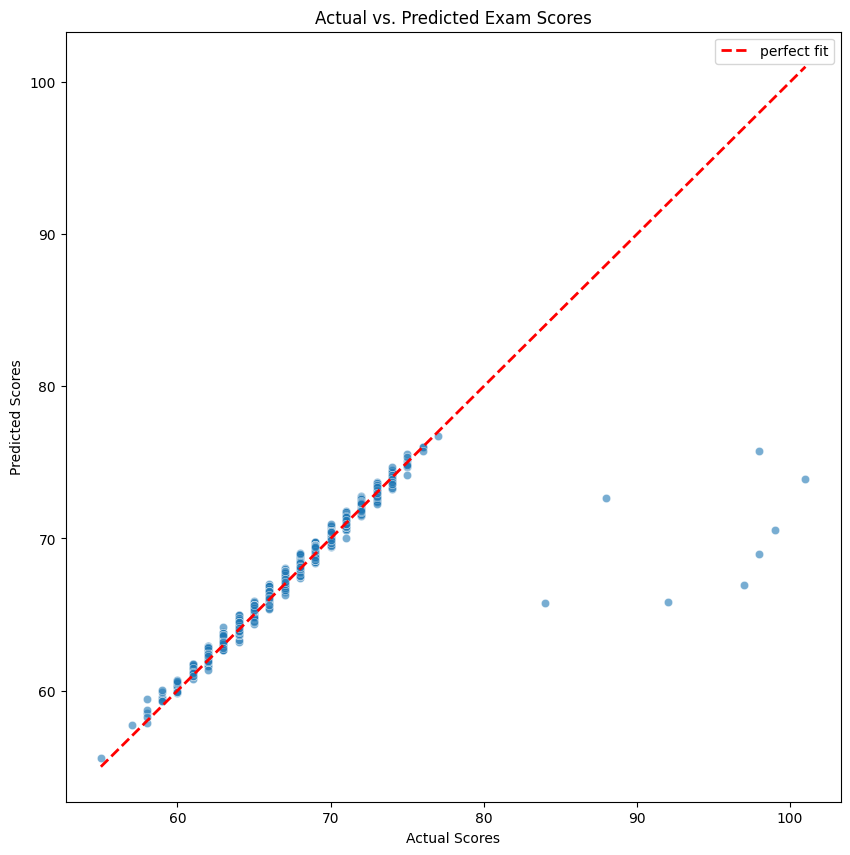

In [36]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=y_pred, alpha=.6)
line_coords = [Y_test.min(), Y_test.max()]
plt.plot(line_coords, line_coords, color='r', linestyle='--', lw=2, label='perfect fit')
plt.title('Actual vs. Predicted Exam Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.show()